In [ ]:
!pip install pandas-datareader


You are using pip version 19.0.3, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
!pip install datetime


You are using pip version 19.0.3, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
!pip install yahoofinance

You are using pip version 19.0.3, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
pip install yahooquery

  Using cached https://files.pythonhosted.org/packages/04/03/7c1e84fbb2ce7edc9ed79b135b4dc621d494d7245592302bd49b33814f78/yahooquery-2.2.6.tar.gz



You are using pip version 19.0.3, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Using cached https://files.pythonhosted.org/packages/47/c4/fd48d1ac5110a5457c71ac7cc4caa93da10a80b8de71112430e439bdee22/requests-futures-1.0.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/80/d6/4294f0b4bce4de0abf13e17190289f9d0613b0a44e5dd6a7f5ca98459853/selenium-3.141.0-py2.py3-none-any.whl
  Running setup.py install for requests-futures: started
    Running setup.py install for requests-futures: finished with status 'done'
  Running setup.py install for yahooquery: started
    Running setup.py install for yahooquery: finished with status 'done'


In [ ]:
from yahooquery import Ticker
import pandas as pd
import numpy  as np
from yahoofinance import HistoricalPrices

amzn = HistoricalPrices('AMZN', '2019-1-1', '2019-12-31')
amzn.to_csv('amzn.csv')
amzn_df = pd.read_csv('amzn.csv')
amzn_df.drop(['Adj Close', 'Volume'], axis = 1, inplace = True)
amzn_df.rename(columns = {'Open':'Amazon Open', 'High':'Amazon High','Low':'Amazon Low', 'Close':'Amazon Close'}, inplace = True)


aapl = HistoricalPrices('AAPL', '2019-1-1', '2019-12-31')
aapl.to_csv('aapl.csv')
aapl_df = pd.read_csv('aapl.csv')
aapl_df.drop(['Adj Close', 'Volume', 'Date'], axis = 1, inplace = True)
aapl_df.rename(columns = {'Open':'Apple Open', 'High':'Apple High','Low':'Apple Low', 'Close':'Apple Close'}, inplace = True)


msft = HistoricalPrices('MSFT', '2019-1-1', '2019-12-31')
msft.to_csv('msft.csv')
msft_df = pd.read_csv('msft.csv')
msft_df.drop(['Adj Close', 'Volume', 'Date'], axis = 1, inplace = True)
msft_df.rename(columns = {'Open':'Microsoft Open', 'High':'Microsoft High','Low':'Microsoft Low', 'Close':'Microsoft Close'}, inplace = True)


googl = HistoricalPrices('GOOGL', '2019-1-1', '2019-12-31')
googl.to_csv('googl.csv')
googl_df = pd.read_csv('googl.csv')
googl_df.drop(['Adj Close', 'Volume', 'Date'], axis = 1, inplace = True)
googl_df.rename(columns = {'Open':'Google Open', 'High':'Google High','Low':'Google Low', 'Close':'Google Close'}, inplace = True)


fb = HistoricalPrices('FB', '2019-1-1', '2019-12-31')
fb.to_csv('fb.csv')
fb_df = pd.read_csv('fb.csv')
fb_df.drop(['Adj Close', 'Volume', 'Date'], axis = 1, inplace = True)
fb_df.rename(columns = {'Open':'FB Open', 'High':'FB High','Low':'FB Low', 'Close':'FB Close'}, inplace = True)

df = pd.merge(amzn_df, aapl_df,how = 'outer', left_index = True, right_index = True)
df = pd.merge(df, msft_df,how = 'outer', left_index = True, right_index = True)
df = pd.merge(df, googl_df,how = 'outer', left_index = True, right_index = True)
df = pd.merge(df, fb_df,how = 'outer', left_index = True, right_index = True)

df.to_csv('api.csv')
#df1 = pd.read_csv(r'D:\Data Science\Data\api.csv')


[]

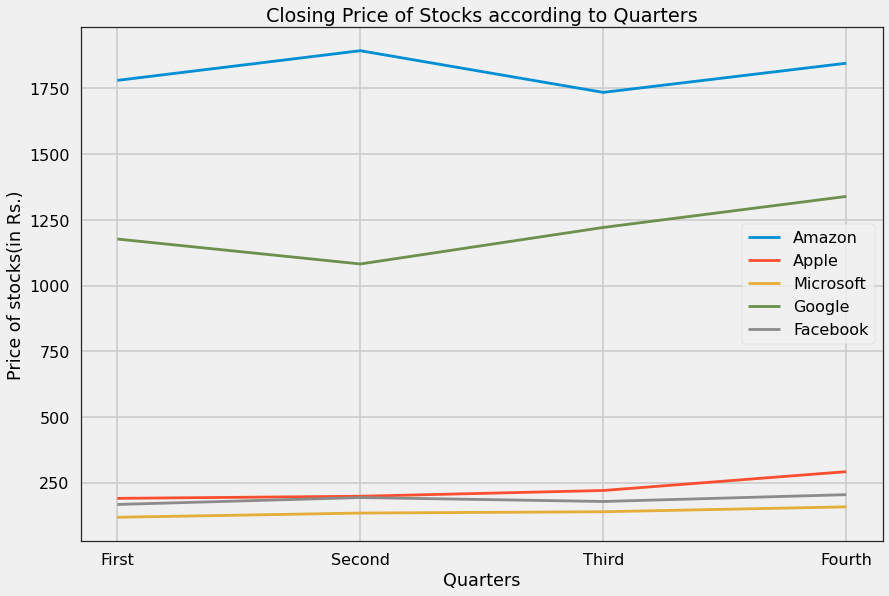

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

quarters = ['First', 'Second', 'Third', 'Fourth']
amzn_close = [1780.75, 1893.63, 1735, 1846]
aapl_close = [189.95, 197.92, 219.89, 291.52 ]
googl_close = [1176.89, 1082, 1221, 1339]
msft_close = [117.94, 133.96, 139, 157.58]
fb_close = [166.69, 193, 178.06, 204]

plt.plot(quarters, amzn_close, label = 'Amazon')
plt.plot(quarters, aapl_close, label = 'Apple')
plt.plot(quarters, msft_close, label = 'Microsoft')
plt.plot(quarters, googl_close, label = 'Google')
plt.plot(quarters, fb_close, label = 'Facebook')
plt.legend()
plt.xlabel('Quarters')
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = "1.25"
plt.ylabel('Price of stocks(in Rs.)')
plt.title('Closing Price of Stocks according to Quarters')
plt.grid(True)
plt.style.use('seaborn-poster')
plt.plot()

In [ ]:
amzn_high = df['Amazon High'].tolist()
msft_high = df['Microsoft High'].tolist()
aapl_high = df['Apple High'].tolist()
googl_high = df['Google High'].tolist()
fb_high = df['FB High'].tolist()

dates = df['Date'].tolist()

max_amzn = max(amzn_high)
amzn_date = dates[amzn_high.index(max_amzn)]

max_msft = max(msft_high)
msft_date = dates[msft_high.index(max_msft)]

max_aapl = max(aapl_high)
aapl_date = dates[aapl_high.index(max_aapl)]

max_googl = max(googl_high)
googl_date = dates[googl_high.index(max_googl)]

max_fb = max(fb_high)
fb_date = dates[fb_high.index(max_fb)]

print("The highest price of Amazon was :: ",max_amzn,",which was the closing price on", amzn_date)
print("The highest price of Microsoft was :: ",max_msft,",which was the closing price on", msft_date)
print("The highest price of Apple was :: ",max_aapl,",which was the closing price on", aapl_date)
print("The highest price of Google was :: ",max_googl,",which was the closing price on", googl_date)
print("The highest price of Facebook was :: ",max_fb,",which was the closing price on", fb_date)

The highest price of Amazon was ::  2035.800049 ,which was the closing price on 2019-07-11
The highest price of Microsoft was ::  159.550003 ,which was the closing price on 2019-12-27
The highest price of Apple was ::  293.97000099999997 ,which was the closing price on 2019-12-27
The highest price of Google was ::  1367.050049 ,which was the closing price on 2019-12-27
The highest price of Facebook was ::  208.929993 ,which was the closing price on 2019-12-27


In [ ]:
amzn_low = df['Amazon Low'].tolist()
msft_low = df['Microsoft Low'].tolist()
aapl_low = df['Apple Low'].tolist()
googl_low = df['Google Low'].tolist()
fb_low = df['FB Low'].tolist()

min_amzn = min(amzn_low)
amzn_date = dates[amzn_low.index(min_amzn)]

min_msft = min(msft_low)
msft_date = dates[msft_low.index(min_msft)]

min_aapl = min(aapl_low)
aapl_date = dates[aapl_low.index(min_aapl)]

min_googl = min(googl_low)
googl_date = dates[googl_low.index(min_googl)]

min_fb = min(fb_low)
fb_date = dates[fb_low.index(min_fb)]

print("The lowest price of Amazon was :: ",min_amzn,",which was the closing price on", amzn_date)
print("The lowest price of Microsoft was :: ",min_msft,",which was the closing price on", msft_date)
print("The lowest price of Apple was :: ",min_aapl,",which was the closing price on", aapl_date)
print("The lowest price of Google was :: ",min_googl,",which was the closing price on", googl_date)
print("The lowest price of Facebook was :: ",min_fb,",which was the closing price on", fb_date)

The lowest price of Amazon was ::  1460.930054 ,which was the closing price on 2019-01-02
The lowest price of Microsoft was ::  97.199997 ,which was the closing price on 2019-01-03
The lowest price of Apple was ::  142.0 ,which was the closing price on 2019-01-03
The lowest price of Google was ::  1022.3699949999999 ,which was the closing price on 2019-01-03
The lowest price of Facebook was ::  128.559998 ,which was the closing price on 2019-01-02


In [ ]:
df['Amazon_Diff'] = df['Amazon High'] - df['Amazon Low']
amzn_diff = max(df['Amazon_Diff'].tolist())
amzn_ddate = dates[(df['Amazon_Diff'].tolist()).index(amzn_diff)]

df['Microsoft_Diff'] = df['Microsoft High'] - df['Microsoft Low']
msft_diff = max(df['Microsoft_Diff'].tolist())
msft_ddate = dates[(df['Microsoft_Diff'].tolist()).index(msft_diff)]

df['Apple_Diff'] = df['Apple High'] - df['Apple Low']
aapl_diff = max(df['Apple_Diff'].tolist())
aapl_ddate = dates[(df['Apple_Diff'].tolist()).index(aapl_diff)]

df['Google_Diff'] = df['Google High'] - df['Google Low']
googl_diff = max(df['Google_Diff'].tolist())
googl_ddate = dates[(df['Google_Diff'].tolist()).index(googl_diff)]

df['Facebook_Diff'] = df['FB High'] - df['FB Low']
fb_diff = max(df['Facebook_Diff'].tolist())
fb_ddate = dates[(df['Facebook_Diff'].tolist()).index(fb_diff)]

print('The biggest drop in Amazon stock prices occured on, ',amzn_ddate,',which was of Rs.',amzn_diff)
print('The biggest drop in Microsoft stock prices occured on, ',msft_ddate,',which was of Rs.',msft_diff)
print('The biggest drop in Apple stock prices occured on, ',aapl_ddate,',which was of Rs.',aapl_diff)
print('The biggest drop in Google stock prices occured on, ',googl_ddate,',which was of Rs.',googl_diff)
print('The biggest drop in Facebook stock prices occured on, ',fb_ddate,',which was of Rs.',fb_diff)

The biggest drop in Amazon stock prices occured on,  2019-06-03 ,which was of Rs. 94.29003899999998
The biggest drop in Microsoft stock prices occured on,  2019-08-23 ,which was of Rs. 5.550003000000004
The biggest drop in Apple stock prices occured on,  2019-10-31 ,which was of Rs. 11.91000299999996
The biggest drop in Google stock prices occured on,  2019-05-15 ,which was of Rs. 56.900024999999914
The biggest drop in Facebook stock prices occured on,  2019-06-03 ,which was of Rs. 14.040008
